# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

#  Multi-Factor Model: Momentum

In this notebook, you will create the momentum factor which will be used in a multi-factor model later.
The following steps are performed while creating the factor:
1. Import the libraries and data 
2. Calculate the daily percentage change
3. Create a Momentum based factor

## Import the libraries and data 

### Import the libraries

You can first start by importing the libraries necessary which will be used later to get the data, store it, and create the factor based portfolio.

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Download the data
The stock data needed for creating the portfolio is downloaded from the '../data_modules/Stock_Prices_2012_To_2017_Factor.csv' file. You can find this file in the last unit of this course, containing all the downloadables.


You will be using the following stocks to create the factors:
Amazon,
Boeing,
Bank of America,
Hewlett-Packard,
Microsoft,
Procter & Gamble, and
Verizon

These stocks were chosen to represent the different sectors of the American economy. This is done to diversify the portfolio.

In [2]:
df = pd.read_csv(
    '../data_modules/Stock_Prices_2012_To_2017_Factor.csv', index_col=[0])

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').date

### Calculate the daily percentage change

In [3]:
# Create a dataframe called df_change to hold the future returns of the stocks
df_change = df.pct_change().shift(-1)

# Drop the rows containing the null values
df_change.dropna(inplace=True)

### Plot the stock returns

You can iterate over each of the stock data to plot the stocks' percentage returns as shown below. You can use the name of the stock shown in each column header as the parameter for iteration. The stock tickers are as follows: <br>

Amazon -- AMZN <br>
Boeing -- BA <br>
Bank of America -- BAC <br>
Hewlett-Packard -- HPQ <br>
Microsoft -- MSFT <br>
Procter & Gamble -- PG <br>
Verizon -- VZ <br>

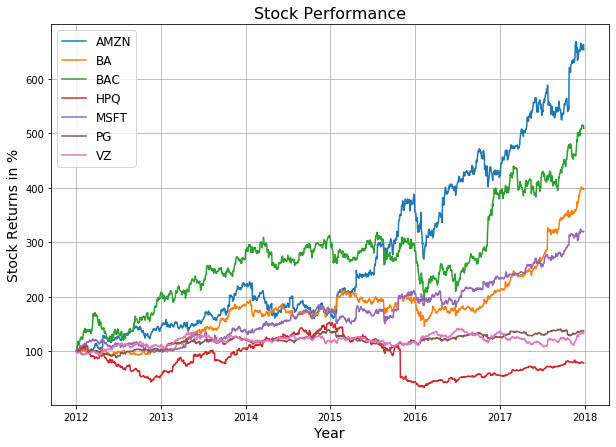

In [4]:
# Plot the percentage returns of  the stocks
plt.figure(figsize=(10, 7))
for column in df_change.columns.values:
    plt.plot(df_change.index, (df_change + 1).cumprod()[column] * 100,
             label=column)
plt.legend(loc='best', fontsize=12)
plt.ylabel('Stock Returns in %',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Stock Performance',fontsize=16)
plt.grid()
plt.show()

## Momentum based factor 

The momentum factor is created using the past one year's performance of the stock. The momentum factor here is the difference between the current price and the past 12 month's average price of the stock.

In [5]:
# Create a variable t to signify the lookback period to calculate the average price of the stock.
# You can consider a period of 21-working days per month
# and 12 months in a year to generate the yearly average price
yearly_working_days = 21 * 12

# Calculate the momentum values for each stock by subtracting the stock price form the mean value
momentum_factor = df - df.rolling(yearly_working_days).mean()

In [6]:
# Let us check the momentum values of the stocks
momentum_factor.tail()

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
2017-12-22,207.588302,82.285567,5.282798,2.652310,13.922063,2.820040,4.926270
2017-12-26,214.336833,81.999734,5.154306,2.597984,13.724127,3.140198,4.958095
2017-12-27,218.206437,81.711560,5.076052,2.613937,13.945119,2.730437,5.019524
2017-12-28,220.403698,81.885012,5.116409,2.469294,13.864921,2.668690,5.169563
2017-12-29,202.169254,79.892552,4.806567,2.305206,13.595079,2.448810,4.672778


In [7]:
# Create two dataframes to hold the buy-sell signals for momentum_buy_stocks and
# momentum_sell_stocks momentum values of stocks
# The momentum_buy_stocks dataframe contains values of the stocks that are more than 0
momentum_buy_stocks = momentum_factor[momentum_factor > 0]

# The momentum_sell_stocks dataframe contains values of the stocks that are less than 0
momentum_sell_stocks = momentum_factor[momentum_factor < 0]

# Here you assume that a value of more than 0 indicates bullishness and you expect this value to remain more than zero,
# so you buy the stock.
# Conversely you sell the stock when the momentum value is less than 0.

#### How does the factor work?

This factor model is a momentum based one, so it buys stocks that are bullish and sells stocks that are bearish as it assumes that the existing momentum will continue. The model buys all those stocks that have a momentum value of more than 0 and sells all those stocks that have a  value of less than 0. You can use the momentum_buy_stocks  and momentum_sell_stocks dataframes to decide which stock to buy or sell. 

You buy stocks in the momentum_buy_stocks dataframe and sell stocks in the momentum_sell_stocks dataframe. And all the stocks are assigned equal capital so the final returns of the momentum factor is the mean of the net returns.

In [8]:
# Calculate the factor performance using the returns and signals
momentum_performance = (df_change * ~momentum_buy_stocks.isnull() - df_change
                        * ~momentum_sell_stocks.isnull()).mean(axis=1)

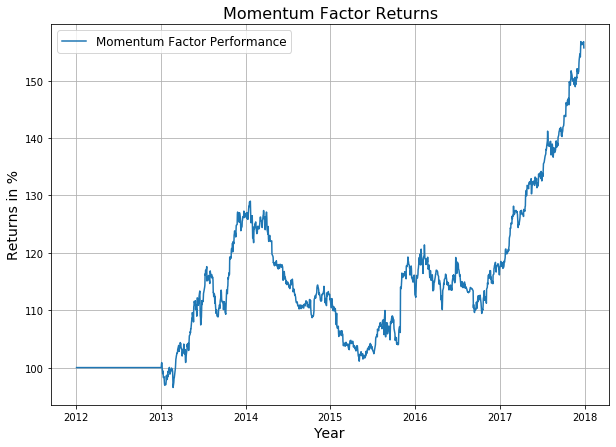

In [9]:
plt.figure(figsize=(10, 7))
plt.plot((momentum_performance + 1).cumprod() * 100,
         label='Momentum Factor Performance')
plt.legend(loc='best', fontsize=12)
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Momentum Factor Returns', fontsize=16)
plt.grid()
plt.show()

In the next units, you will learn how to code a Short-Term Reversal factor.
<BR>